In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the cylinder dataset from VORTALL.csv

data = np.loadtxt("Data/cylinder/VORTALL.csv", delimiter=',').T
nx = int(np.loadtxt("Data/cylinder/n.csv").item())
ny = int(np.loadtxt("Data/cylinder/m.csv").item())



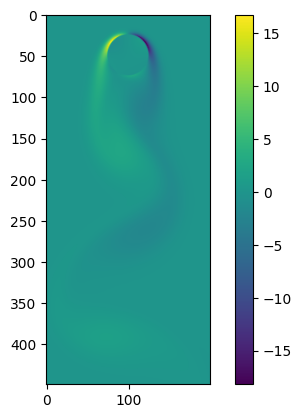

In [4]:
plt.imshow(data[0,:].reshape((nx,ny)),cmap='viridis')
plt.colorbar();

In [5]:
n = data.shape[0]
val_length = 5
lags = 10

train_indices = np.arange(0, int(n*0.85))
valid_indices = np.arange(int(n*0.85), int(n*0.85) + val_length)
test_indices = np.arange(int(n*0.85) + val_length, n - lags)

## Load and visualize reconstructions

In [9]:
def plot_reconstruction(reconstruction,truths,plot_index, sensor_locations, num_sensors=10, title="SHRED reconstruction"):

    # Convert the sensor location indices from the 1D array to indices in the reshaped 2D array
    sensor_locations_2d = np.array([np.unravel_index(loc, (nx, ny)) for loc in sensor_locations])
    plot_recon = reconstruction[plot_index]
    plot_true = truths[plot_index]
    plot_err =  truths[plot_index]-reconstruction[plot_index]
    # min and max values for the colorbar
    vmin = -max(abs(np.min(plot_err)),abs(np.max(plot_err)))
    vmax = max(abs(np.min(plot_err)),abs(np.max(plot_err)))

    fig,axs = plt.subplots(1,3,figsize=(12,6))
    fig.suptitle(title)

    pl = axs[0].imshow(plot_recon.reshape((nx,ny)),cmap='YlGnBu')
    plt.colorbar(pl)
    axs[0].set_title('Reconstruction')


    pl = axs[1].imshow(plot_true.reshape((nx,ny)),cmap='YlGnBu')
    plt.colorbar(pl)
    axs[1].set_title('Ground truth')

    pl = axs[2].imshow(plot_err.reshape((nx,ny)),cmap="bwr",vmin=vmin,vmax=vmax)
    plt.colorbar(pl)
    axs[2].set_title('Error')

    # Add a red dot to the spatial points indicated by the sensor locations
    for i in range(num_sensors):
        axs[0].scatter(sensor_locations_2d[i,1], sensor_locations_2d[i,0], color='red', s=40, label='Sensor location')
        axs[1].scatter(sensor_locations_2d[i,1], sensor_locations_2d[i,0], color='red', s=40, label='Sensor location')

    plt.tight_layout()

def compute_RMSES(reconstruction,truths,printrmse=True):
    # RMSE for training, validation and test sets
    # Train set
    # rmse = np.sqrt(np.mean(np.square((reconstruction[train_idx]-truths[train_idx]))))
    # print('Train RMSE:      ', rmse)

    # # Validation set
    # rmse = np.sqrt(np.mean(np.square((reconstruction[val_idx]-truths[val_idx]))))
    # print('Validation RMSE: ', rmse)

    # Validation set
    rmse = np.sqrt(np.mean(np.square((reconstruction-truths))))
    if printrmse: print('Test RMSE:       ', rmse)
    return rmse



Test RMSE:        0.01649462


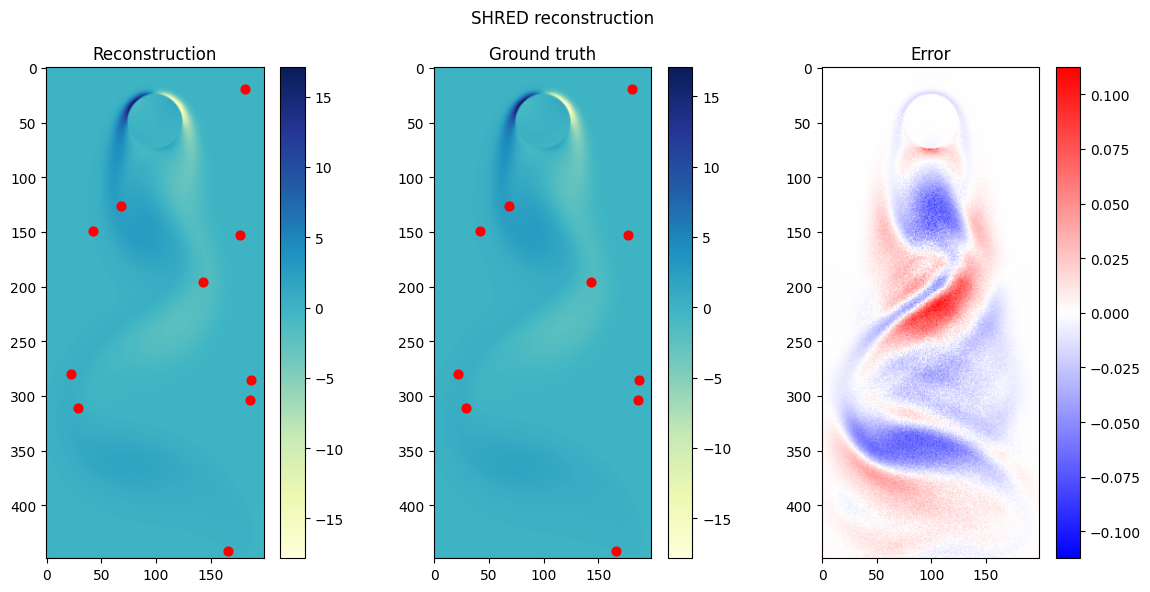

Test RMSE:        0.908434710514164


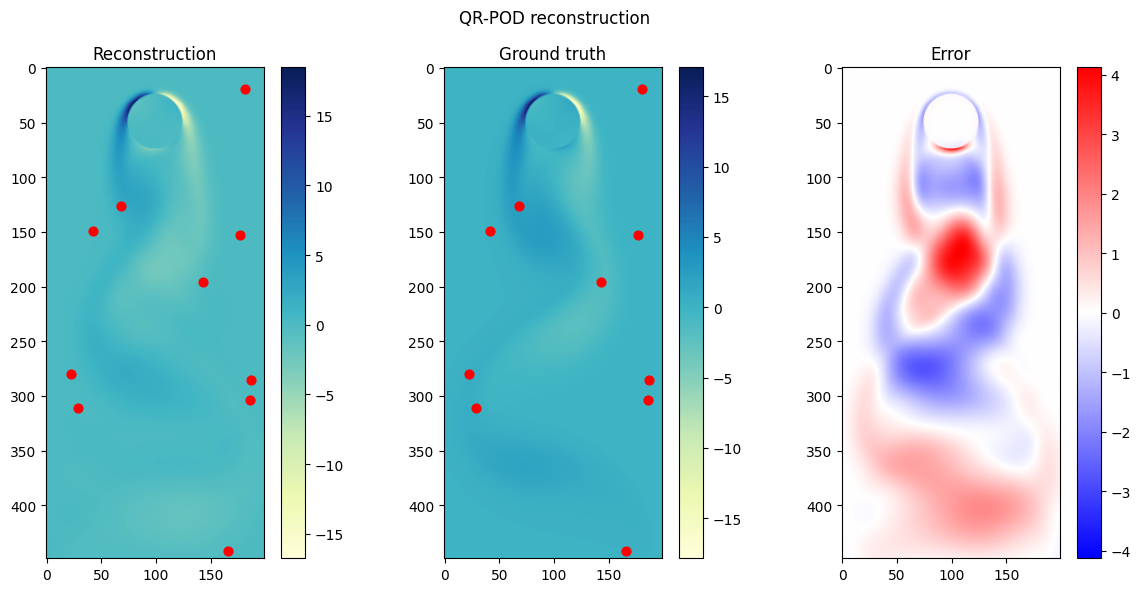

In [10]:
plot_index = 6 
num_sensors = 10
lag=10

reconstruction = np.load(f'ReconstructingResults/cylinder/reconstructions_sensor{num_sensors}lag{lag}.npy')
truths = np.load('ReconstructingResults/cylinder/truth.npy')
sensor_locations = np.load(f'ReconstructingResults/cylinder/sensor_locations_sensor{num_sensors}lag{lag}.npy')

compute_RMSES(reconstruction,truths)

plot_reconstruction(reconstruction, truths, plot_index, sensor_locations,num_sensors=num_sensors)
plt.show()

reconstruction = np.load(f'ReconstructingResults/cylinder/qrpodreconstructions_sensor{num_sensors}lag{lag}.npy')
truths = np.load('ReconstructingResults/cylinder/truth.npy')
sensor_locations = np.load(f'ReconstructingResults/cylinder/sensor_locations_sensor{num_sensors}lag{lag}.npy')

compute_RMSES(reconstruction,truths)

plot_reconstruction(reconstruction, truths, plot_index, sensor_locations,num_sensors=num_sensors, title="QR-POD reconstruction")
plt.show()



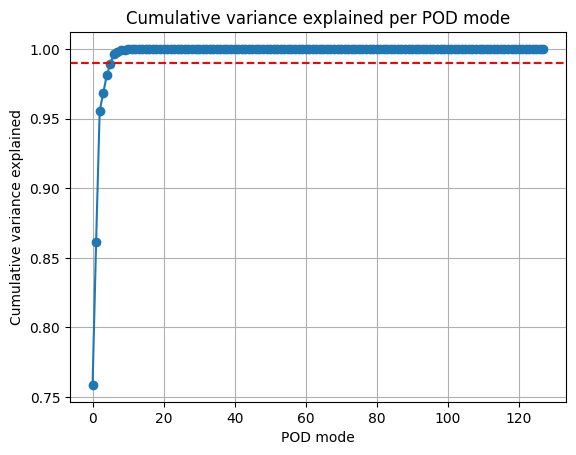

In [42]:
Sigma = np.load(f'ReconstructingResults/cylinder/singularvals_sensor{num_sensors}lag{lag}.npy')

# plt.semilogy(Sigma,'o-');
# plt.grid()
# plt.title('Singular values of the POD modes')

# Compute the cummulative variance explained per POD mode and plot
plt.figure()
cumulative_variance = np.cumsum(Sigma**2) / np.sum(Sigma**2)
plt.plot(cumulative_variance, 'o-')
plt.grid()
plt.title('Cumulative variance explained per POD mode')
plt.xlabel('POD mode')
plt.ylabel('Cumulative variance explained')
plt.axhline(y=0.99, color='r', linestyle='--')


## Reconstruction errors for different number of sensors


In [12]:

lag = 10
truths = np.load('ReconstructingResults/cylinder/truth.npy')

Nvals = [1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,75]

err_qrpod = np.zeros(len(Nvals))
err_qrshred = np.zeros(len(Nvals))

err_qrpod_lw = np.zeros(len(Nvals))
err_qrshred_lw = np.zeros(len(Nvals))
err_qrpod_hi = np.zeros(len(Nvals))
err_qrshred_hi = np.zeros(len(Nvals))


for i,n in enumerate(Nvals):

    reconstruction_QRSHRED = np.load(f'ReconstructingResults/cylinder/reconstructions_sensor{n}lag{lag}.npy')

    reconstruction_QRPOD = np.load(f'ReconstructingResults/cylinder/qrpodreconstructions_sensor{n}lag{lag}.npy')

    err_QRSHRED = abs(truths - reconstruction_QRSHRED)
    err_QRPOD = abs(truths - reconstruction_QRPOD)

    # Compute mean abs error for each N value
    err_qrshred[i] =  np.median(err_QRSHRED)
    err_qrpod[i] =    np.median(err_QRPOD)
    # Also collect the interquartile range of the errors
    err_qrshred_lw[i] = np.percentile(err_QRSHRED, 25)
    err_qrshred_hi[i] = np.percentile(err_QRSHRED, 75)
    err_qrpod_lw[i] =   np.percentile(err_QRPOD, 25)
    err_qrpod_hi[i] =   np.percentile(err_QRPOD, 75)


In [13]:
err_qrshred

array([0.00371736, 0.00415784, 0.00245848, 0.00158011, 0.00174754,
       0.00211433, 0.0015951 , 0.00208265, 0.00181961, 0.00405991,
       0.00494933, 0.00369865, 0.00312994, 0.00295413, 0.00309892,
       0.00327464])

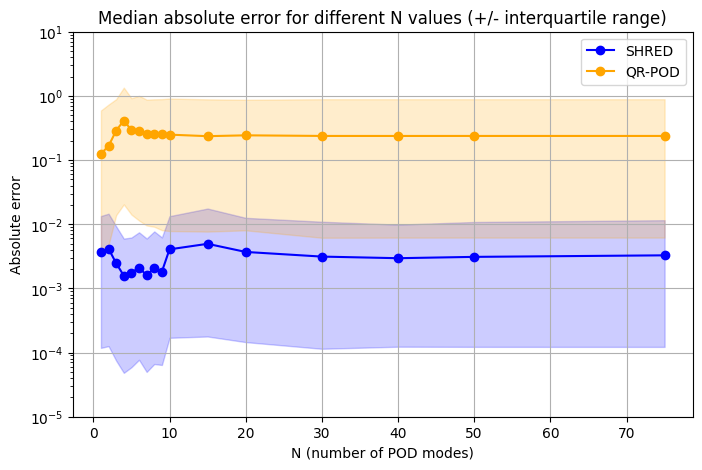

In [15]:
# Make plot of the errors with their min and max values as a shaded area
plt.figure(figsize=(8,5))
plt.semilogy(Nvals, err_qrshred, 'o-', label='SHRED', color='blue')
plt.fill_between(Nvals, err_qrshred_lw, err_qrshred_hi, color='blue', alpha=0.2)
plt.semilogy(Nvals, err_qrpod, 'o-', label='QR-POD', color='orange')
plt.fill_between(Nvals, err_qrpod_lw, err_qrpod_hi, color='orange', alpha=0.2)
plt.grid()
plt.title('Median absolute error for different N values (+/- interquartile range)')
plt.xlabel('N (number of POD modes)')
plt.ylabel('Absolute error')
plt.ylim(1e-5, 1e1)
plt.legend()


## Look at latent spaces

In [ ]:
# Load model
import models
import torch

m = 89351
num_sensors = 2

device = 'cuda' if torch.cuda.is_available() else 'cpu'

shred = models.SHRED(num_sensors, m, hidden_size=64, hidden_layers=2, l1=350, l2=400, dropout=0.0)

shred.load_weights("models/cylinder/shred_reconstruction_sensor2lag10.pt",device=device)

In [34]:
array_in = torch.tensor(np.array([np.repeat(0.1,lags),np.repeat(0,lags)]).reshape(1,lags,-1),dtype=torch.float32).to(device)
shred(array_in)
shred.h_out.shape

torch.Size([1, 64])